# What factors determine the success or popularity of a business?
In this notebook we are going to see how we could make sure our dream business venture succeed despite neighboring competition all around. There will be a lot of factors to take into account such as the kind of food we serve, our location , and even the cost of our products. Until now we haven't decided what kind of business to create but rather we're just looking to analyze the market on a cursory level in this notebook and in subsequent ones we plan on going further in depth with regressions including multiple independent variables , time-series analysis, etc.

To begin we'll import some need libraries

In [38]:
from google.oauth2 import service_account
from google.cloud import bigquery
import configparser
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format

Now we'll be setting up authentication to connect to our data warehouse in Google Big Query

In [2]:
KEY_PATH = "/mnt/c/Users/Ron/git-repos/yelp-data/gourmanddwh-f75384f95e86.json"
CREDS = service_account.Credentials.from_service_account_file(KEY_PATH)
client = bigquery.Client(credentials=CREDS, project=CREDS.project_id)

Using the bigquery API we can use select statements to place the results in pandas dataframes so we'll do so for a couple of queries


In [3]:
cg_file = open('sql_scripts/county_growth_est.sql','r')
county_growth_query =  cg_file.read()
cg_dataframe = (
    client.query(county_growth_query)
    .result()
    .to_dataframe()
)

In [4]:
holding_file = open('sql_scripts/business_daily_holding.sql')
holding_query = holding_file.read()

holding_dataframe = (
    client.query(holding_query)
    .result()
    .to_dataframe()
)

In [5]:
bus_cat_file = open('sql_scripts/business_category_location.sql')
bus_cat_query = bus_cat_file.read()

bus_cat_dataframe = (
    client.query(bus_cat_query)
    .result()
    .to_dataframe()
)

explain differences from previous year

In [14]:
cg_dataframe

,StateName,CountyName,EstimationYear,EstimatedPopulation,lastpop,relative_delta,abs_delta
0,California,Siskiyou County,2019,43539,43550,-0.00,-11
1,Colorado,Saguache County,2019,6824,6840,-0.00,-16
2,Indiana,Madison County,2019,129569,129573,-0.00,-4
3,Kansas,Franklin County,2019,25544,25625,-0.00,-81
4,Kentucky,Green County,2019,10941,10998,-0.01,-57
...,...,...,...,...,...,...,...
3215,South Dakota,Jones County,2019,903,928,-0.03,-25
3216,Tennessee,Hardeman County,2019,25050,25276,-0.01,-226
3217,Texas,Scurry County,2019,16703,16812,-0.01,-109
3218,Wisconsin,Pierce County,2019,42754,42592,0.00,162


Making slight changes on the data types

In [15]:
holding_dataframe

,BusinessName,ChainName,BusinessRating,ReviewCount,CloseDate,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta
0,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.000000000,2,2021-12-29,NaN,None,NaN,None,0.00,0E-9
1,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.000000000,2,2022-01-07,2.00,3.000000000,0.00,0E-9,0.00,0E-9
2,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.000000000,2,2022-01-08,2.00,3.000000000,0.00,0E-9,0.00,0E-9
3,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.000000000,2,2022-01-09,2.00,3.000000000,0.00,0E-9,0.00,0E-9
4,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.000000000,2,2022-01-10,2.00,3.000000000,0.00,0E-9,0.00,0E-9
...,...,...,...,...,...,...,...,...,...,...,...
510424,él-torito-restaurant-georgetown,Él Torito Restaurant,4.000000000,2,2022-01-09,2.00,4.000000000,0.00,0E-9,0.00,0E-9
510425,él-torito-restaurant-georgetown,Él Torito Restaurant,4.000000000,2,2022-01-10,2.00,4.000000000,0.00,0E-9,0.00,0E-9
510426,él-torito-restaurant-georgetown,Él Torito Restaurant,4.000000000,2,2022-01-11,2.00,4.000000000,0.00,0E-9,0.00,0E-9
510427,él-torito-restaurant-georgetown,Él Torito Restaurant,4.000000000,2,2022-01-12,2.00,4.000000000,0.00,0E-9,0.00,0E-9


In [16]:
holding_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510429 entries, 0 to 510428
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   BusinessName            510429 non-null  object        
 1   ChainName               510429 non-null  object        
 2   BusinessRating          510429 non-null  object        
 3   ReviewCount             510429 non-null  int64         
 4   CloseDate               510429 non-null  datetime64[ns]
 5   previous_review_cnt     447112 non-null  float64       
 6   previous_rating         447112 non-null  object        
 7   abs_review_diff         447112 non-null  float64       
 8   abs_rating_diff         447112 non-null  object        
 9   total_review_cnt_delta  509680 non-null  float64       
 10  total_bus_rating_delta  509680 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 42.8+ MB


In [19]:
holding_dataframe['CloseDate'] = pd.to_datetime(holding_dataframe['CloseDate'])
holding_dataframe[['BusinessRating', 'previous_rating', 'abs_rating_diff', 'total_bus_rating_delta']] = holding_dataframe[['BusinessRating', 'previous_rating', 'abs_rating_diff', 'total_bus_rating_delta']].astype(float)

In [20]:
holding_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510429 entries, 0 to 510428
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   BusinessName            510429 non-null  object        
 1   ChainName               510429 non-null  object        
 2   BusinessRating          510429 non-null  float64       
 3   ReviewCount             510429 non-null  int64         
 4   CloseDate               510429 non-null  datetime64[ns]
 5   previous_review_cnt     447112 non-null  float64       
 6   previous_rating         447112 non-null  float64       
 7   abs_review_diff         447112 non-null  float64       
 8   abs_rating_diff         447112 non-null  float64       
 9   total_review_cnt_delta  509680 non-null  float64       
 10  total_bus_rating_delta  509680 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 42.8+ MB


In [21]:
holding_dataframe

,BusinessName,ChainName,BusinessRating,ReviewCount,CloseDate,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta
0,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.00,2,2021-12-29,NaN,NaN,NaN,NaN,0.00,0.00
1,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.00,2,2022-01-07,2.00,3.00,0.00,0.00,0.00,0.00
2,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.00,2,2022-01-08,2.00,3.00,0.00,0.00,0.00,0.00
3,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.00,2,2022-01-09,2.00,3.00,0.00,0.00,0.00,0.00
4,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.00,2,2022-01-10,2.00,3.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
510424,él-torito-restaurant-georgetown,Él Torito Restaurant,4.00,2,2022-01-09,2.00,4.00,0.00,0.00,0.00,0.00
510425,él-torito-restaurant-georgetown,Él Torito Restaurant,4.00,2,2022-01-10,2.00,4.00,0.00,0.00,0.00,0.00
510426,él-torito-restaurant-georgetown,Él Torito Restaurant,4.00,2,2022-01-11,2.00,4.00,0.00,0.00,0.00,0.00
510427,él-torito-restaurant-georgetown,Él Torito Restaurant,4.00,2,2022-01-12,2.00,4.00,0.00,0.00,0.00,0.00


In [9]:
bus_cat_dataframe

,BusinessKey,BusinessName,ChainName,PaymentLevelName,Longitude,Latitude,BusinessCategoryName,CityName,CountyName,StateName,CountryName
0,23,eastern-shore-street-eats-daphne,Eastern Shore Street Eats,Unknown,-87.868675000,30.614799000,American (Traditional),Daphne,Baldwin County,Alabama,US
1,23,eastern-shore-street-eats-daphne,Eastern Shore Street Eats,Unknown,-87.868675000,30.614799000,Food Trucks,Daphne,Baldwin County,Alabama,US
2,33,chris-hot-dogs-montgomery-2,Chris' Hot Dogs,Very Low,-86.306631000,32.377287000,Hot Dogs,Montgomery,Autauga County,Alabama,US
3,122,benjas-thai-and-sushi-restaurant-mobile,Benja's Thai & Sushi Restaurant,Low,-88.190163000,30.662022000,Sushi Bars,Mobile,Mobile County,Alabama,US
4,122,benjas-thai-and-sushi-restaurant-mobile,Benja's Thai & Sushi Restaurant,Low,-88.190163000,30.662022000,Thai,Mobile,Mobile County,Alabama,US
...,...,...,...,...,...,...,...,...,...,...,...
126522,62893,munchies-evanston,Munchies,Unknown,-110.965810000,41.268390000,Hot Dogs,Evanston,Uinta County,Wyoming,US
126523,63106,don-juan-mexican-restaurant-casper,Don Juan Mexican Restaurant,Very Low,-106.325400000,42.849180000,Mexican,Casper,Natrona County,Wyoming,US
126524,63128,the-hangar-bar-and-grill-bar-nunn,The Hangar Bar And Grill,Low,-106.342377000,42.914669000,American (Traditional),Bar Nunn,Natrona County,Wyoming,US
126525,63155,wyoming-hot-wings-casper,Wyoming Hot Wings,Low,-106.302002000,42.838868000,Chicken Wings,Casper,Converse County,Wyoming,US


In [22]:
bus_cat_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126527 entries, 0 to 126526
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   BusinessKey           126527 non-null  int64 
 1   BusinessName          126527 non-null  object
 2   ChainName             126527 non-null  object
 3   PaymentLevelName      126527 non-null  object
 4   Longitude             126526 non-null  object
 5   Latitude              126526 non-null  object
 6   BusinessCategoryName  126527 non-null  object
 7   CityName              126527 non-null  object
 8   CountyName            126527 non-null  object
 9   StateName             126527 non-null  object
 10  CountryName           126527 non-null  object
dtypes: int64(1), object(10)
memory usage: 10.6+ MB


We'll pause to serialize the data before we start any more transforms to retain it's state. 

In [23]:
cg_dataframe.to_csv('county_growth_est.csv',sep='|', index=False )
holding_dataframe.to_csv('holding.csv',sep='|', index=False )
bus_cat_dataframe.to_csv('bus_cat.csv',sep='|', index=False )

Now we'll read the data back in and conduct some exploratory analysis

In [2]:
cg_dataframe = pd.read_csv('county_growth_est.csv',sep='|', low_memory=True)
holding_dataframe = pd.read_csv('holding.csv',sep='|', low_memory=True)
bus_cat_dataframe = pd.read_csv('bus_cat.csv',sep='|', low_memory=True)

The dataset `cg_dataframe` shows us some estimated population statistics for the year 2019. We will look into what impact this year by have on the rest of our data as it comes 2021/2022

In [3]:
cg_dataframe

,StateName,CountyName,EstimationYear,EstimatedPopulation,lastpop,relative_delta,abs_delta
0,California,Siskiyou County,2019,43539,43550,-0.00,-11
1,Colorado,Saguache County,2019,6824,6840,-0.00,-16
2,Indiana,Madison County,2019,129569,129573,-0.00,-4
3,Kansas,Franklin County,2019,25544,25625,-0.00,-81
4,Kentucky,Green County,2019,10941,10998,-0.01,-57
...,...,...,...,...,...,...,...
3215,South Dakota,Jones County,2019,903,928,-0.03,-25
3216,Tennessee,Hardeman County,2019,25050,25276,-0.01,-226
3217,Texas,Scurry County,2019,16703,16812,-0.01,-109
3218,Wisconsin,Pierce County,2019,42754,42592,0.00,162


The dataset `holding_dataframe` shows us some of the business' ratings and review counts with which a business closed out on a particular day. That's to say that we have duplicates of each business itself and we are seeing their changes on each day. Fortunately the column `total_review_cnt_delta` gives us the total absolute change for a business from it's start date to the end date.

In [4]:
holding_dataframe.sort_values(['total_review_cnt_delta', 'CloseDate'], ascending = False).head(10)

,BusinessName,ChainName,BusinessRating,ReviewCount,CloseDate,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta
199943,houstons-hot-chicken-henderson-3,Houston's Hot Chicken,5.00,414,2022-01-13,410.00,5.00,4.00,0.00,74.00,0.00
199942,houstons-hot-chicken-henderson-3,Houston's Hot Chicken,5.00,410,2022-01-12,413.00,5.00,-3.00,0.00,74.00,0.00
199941,houstons-hot-chicken-henderson-3,Houston's Hot Chicken,5.00,413,2022-01-11,414.00,5.00,-1.00,0.00,74.00,0.00
199940,houstons-hot-chicken-henderson-3,Houston's Hot Chicken,5.00,414,2022-01-10,413.00,5.00,1.00,0.00,74.00,0.00
199939,houstons-hot-chicken-henderson-3,Houston's Hot Chicken,5.00,413,2022-01-09,408.00,5.00,5.00,0.00,74.00,0.00
199938,houstons-hot-chicken-henderson-3,Houston's Hot Chicken,5.00,408,2022-01-08,401.00,5.00,7.00,0.00,74.00,0.00
199937,houstons-hot-chicken-henderson-3,Houston's Hot Chicken,5.00,401,2022-01-07,401.00,5.00,0.00,0.00,74.00,0.00
199936,houstons-hot-chicken-henderson-3,Houston's Hot Chicken,5.00,401,2022-01-06,340.00,5.00,61.00,0.00,74.00,0.00
199935,houstons-hot-chicken-henderson-3,Houston's Hot Chicken,5.00,340,2021-12-29,NaN,NaN,NaN,NaN,74.00,0.00
160877,founding-farmers-washington-washington-3,Founding Farmers - Washington,4.00,14427,2022-01-13,"14,422.00",4.00,5.00,0.00,70.00,0.00


A good example is the business **houstons-hot-chicken-henderson-3** if you add up the changes by each day (conveniently shown by the column `abs_review_diff`) then you'll be able to see that this business had an increase of 74 reviews! However One must keep in mind that 61 of those came over the span of about 8 days.

So we're going to keep the last close out date for each business and see which categories, payment levels, etc undergo the most changes in their reviews and ratings.

In [5]:
most_recent_holding = holding_dataframe.sort_values(['BusinessName', 'CloseDate'], ascending = False).drop_duplicates(subset=['BusinessName'] , keep='first')
most_recent_holding

,BusinessName,ChainName,BusinessRating,ReviewCount,CloseDate,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta
510428,él-torito-restaurant-georgetown,Él Torito Restaurant,4.00,2,2022-01-13,2.00,4.00,0.00,0.00,0.00,0.00
510420,ándale-caguas-2,Ándale,5.00,3,2022-01-13,3.00,5.00,0.00,0.00,0.00,0.00
510412,àlavita-boise-2,ÀLAVITA,4.00,304,2022-01-13,304.00,4.00,0.00,0.00,0.00,0.00
510402,zzzz-s-pizzzza-burlington,ZZZZ’s PIzzzza,5.00,1,2022-01-13,1.00,5.00,0.00,0.00,0.00,0.00
510394,zzs-sports-bar-and-grill-adrian,ZZ's Sports Bar & Grill,3.50,10,2022-01-13,10.00,3.50,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
39,10-40-coffee-west-plains,10/40 Coffee,5.00,11,2022-01-13,11.00,5.00,0.00,0.00,0.00,0.00
31,1-north-steakhouse-hampton-bays-2,1 North Steakhouse,4.00,149,2022-01-13,149.00,4.00,0.00,0.00,2.00,0.00
23,1-more-bar-and-grille-bright,1 More Bar & Grille,4.00,9,2022-01-13,9.00,4.00,0.00,0.00,0.00,0.00
15,1-cow-ten-sleep,1 Cow,4.50,6,2022-01-13,6.00,4.50,0.00,0.00,0.00,0.00


The resulting amount is 63317 businesses which is expected since that is the number of businesses we are tracking.

Let's pause briefly there to take a look at out next dataset.

The dataset `bus_cat_dataframe` provides additional information about each business such as location, the categories offered by the business and as such it contains duplicates businesses (a business instance for each of it's categories). For example `mcdonalds-geneva` is shown 3 times as it is categorized as a business specializing in "Burgers", "Coffee & Tea", "Fast Food"

In [6]:
bus_cat_dataframe

,BusinessKey,BusinessName,ChainName,PaymentLevelName,Longitude,Latitude,BusinessCategoryName,CityName,CountyName,StateName,CountryName
0,23,eastern-shore-street-eats-daphne,Eastern Shore Street Eats,Unknown,-87.87,30.61,American (Traditional),Daphne,Baldwin County,Alabama,US
1,23,eastern-shore-street-eats-daphne,Eastern Shore Street Eats,Unknown,-87.87,30.61,Food Trucks,Daphne,Baldwin County,Alabama,US
2,33,chris-hot-dogs-montgomery-2,Chris' Hot Dogs,Very Low,-86.31,32.38,Hot Dogs,Montgomery,Autauga County,Alabama,US
3,122,benjas-thai-and-sushi-restaurant-mobile,Benja's Thai & Sushi Restaurant,Low,-88.19,30.66,Sushi Bars,Mobile,Mobile County,Alabama,US
4,122,benjas-thai-and-sushi-restaurant-mobile,Benja's Thai & Sushi Restaurant,Low,-88.19,30.66,Thai,Mobile,Mobile County,Alabama,US
...,...,...,...,...,...,...,...,...,...,...,...
126522,62893,munchies-evanston,Munchies,Unknown,-110.97,41.27,Hot Dogs,Evanston,Uinta County,Wyoming,US
126523,63106,don-juan-mexican-restaurant-casper,Don Juan Mexican Restaurant,Very Low,-106.33,42.85,Mexican,Casper,Natrona County,Wyoming,US
126524,63128,the-hangar-bar-and-grill-bar-nunn,The Hangar Bar And Grill,Low,-106.34,42.91,American (Traditional),Bar Nunn,Natrona County,Wyoming,US
126525,63155,wyoming-hot-wings-casper,Wyoming Hot Wings,Low,-106.30,42.84,Chicken Wings,Casper,Converse County,Wyoming,US


Now we'll visualize some of the data a bit to try and get a better perspective. A good place to start would be to visualize some of the distributions.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
most_recent_holding = most_recent_holding.reset_index(drop=True)
most_recent_holding

,BusinessName,ChainName,BusinessRating,ReviewCount,CloseDate,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta
0,él-torito-restaurant-georgetown,Él Torito Restaurant,4.00,2,2022-01-13,2.00,4.00,0.00,0.00,0.00,0.00
1,ándale-caguas-2,Ándale,5.00,3,2022-01-13,3.00,5.00,0.00,0.00,0.00,0.00
2,àlavita-boise-2,ÀLAVITA,4.00,304,2022-01-13,304.00,4.00,0.00,0.00,0.00,0.00
3,zzzz-s-pizzzza-burlington,ZZZZ’s PIzzzza,5.00,1,2022-01-13,1.00,5.00,0.00,0.00,0.00,0.00
4,zzs-sports-bar-and-grill-adrian,ZZ's Sports Bar & Grill,3.50,10,2022-01-13,10.00,3.50,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
63312,10-40-coffee-west-plains,10/40 Coffee,5.00,11,2022-01-13,11.00,5.00,0.00,0.00,0.00,0.00
63313,1-north-steakhouse-hampton-bays-2,1 North Steakhouse,4.00,149,2022-01-13,149.00,4.00,0.00,0.00,2.00,0.00
63314,1-more-bar-and-grille-bright,1 More Bar & Grille,4.00,9,2022-01-13,9.00,4.00,0.00,0.00,0.00,0.00
63315,1-cow-ten-sleep,1 Cow,4.50,6,2022-01-13,6.00,4.50,0.00,0.00,0.00,0.00


array([[<AxesSubplot:title={'center':'BusinessRating'}>,
        <AxesSubplot:title={'center':'ReviewCount'}>,
        <AxesSubplot:title={'center':'previous_review_cnt'}>],
       [<AxesSubplot:title={'center':'previous_rating'}>,
        <AxesSubplot:title={'center':'abs_review_diff'}>,
        <AxesSubplot:title={'center':'abs_rating_diff'}>],
       [<AxesSubplot:title={'center':'total_review_cnt_delta'}>,
        <AxesSubplot:title={'center':'total_bus_rating_delta'}>,
        <AxesSubplot:>]], dtype=object)

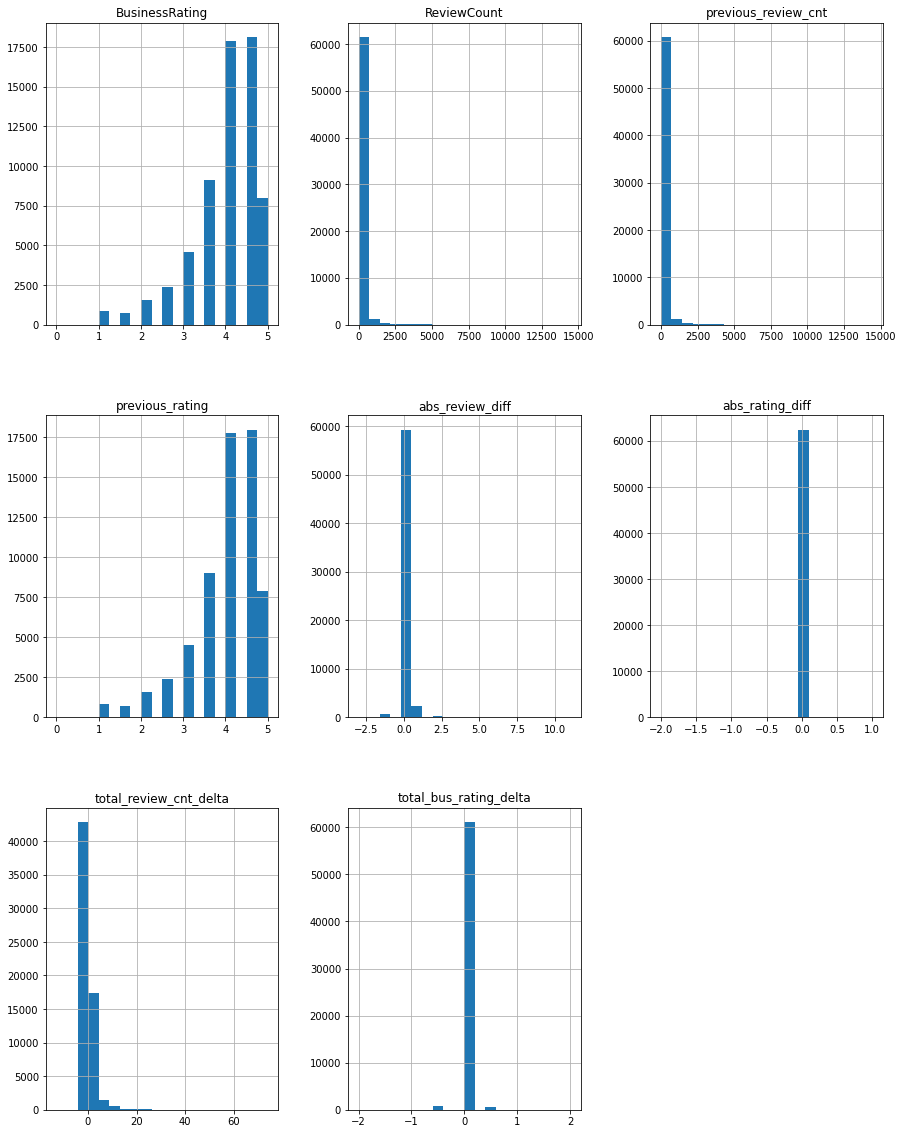

In [9]:
most_recent_holding.hist(bins=20,figsize=(15,20))

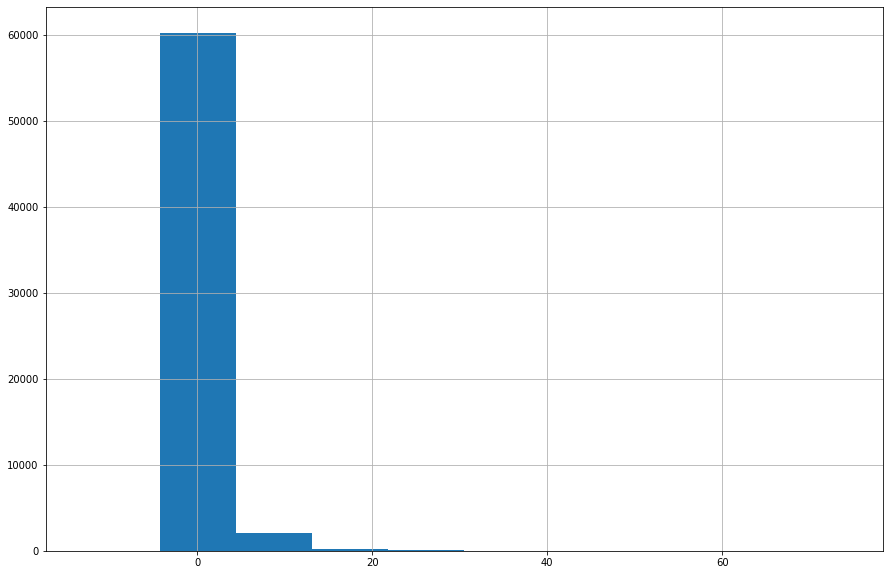

In [64]:
# fig, axs = plt.subplots(1,1)
# fig
# axs.hist(most_recent_holding['total_review_cnt_delta'], bins=30)
plt.figure(figsize= (15,10))
plt.hist(most_recent_holding['total_review_cnt_delta'], bins=10)
plt.grid()

Text(0.5, 1.0, 'Business Rating Δ Histogram')

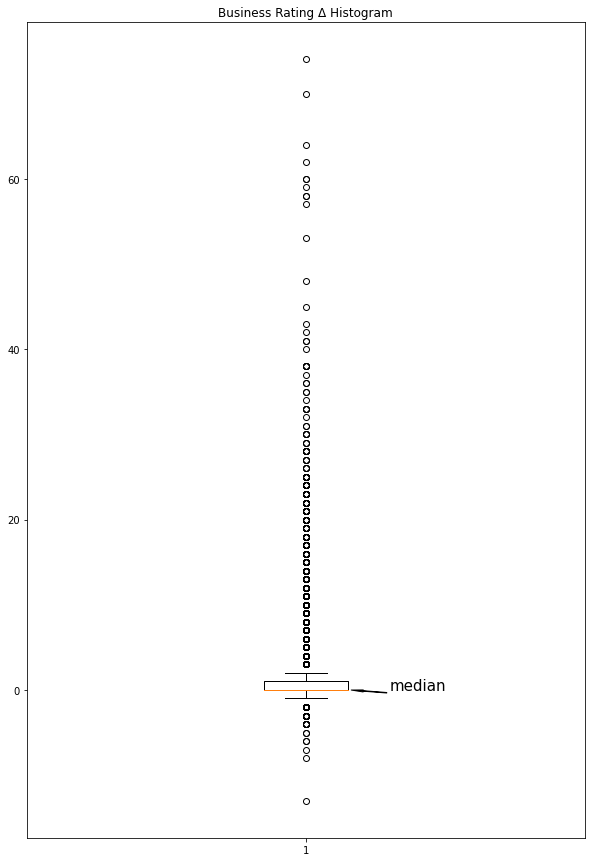

In [63]:
fig, ax = plt.subplots(figsize=(10, 15))
ax.boxplot(x=most_recent_holding['total_review_cnt_delta'].dropna(), vert=True)

plt.annotate('outlier threshold',xy=(1.05,780),xytext=(1.15,780),size=7,arrowprops=dict(facecolor='black',headwidth=2, width=0.5, shrink=0.02))

# plt.annotate('3rd quartile', xy=(1.08,570), xytext=(1.15,570), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('median', xy=(1.08,most_recent_holding['total_review_cnt_delta'].median()), xytext=(1.15,most_recent_holding['total_review_cnt_delta'].median()), size=15, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
# plt.annotate('1st quartile', xy=(1.08,430), xytext=(1.15,430), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
# plt.annotate('outlier threshold', xy=(1.05,220), xytext=(1.15,220), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
ax.set_title(u'Business Rating Δ Histogram')


# plt.boxplot(most_recent_holding['total_review_cnt_delta'])

Text(0.5, 1.0, '')

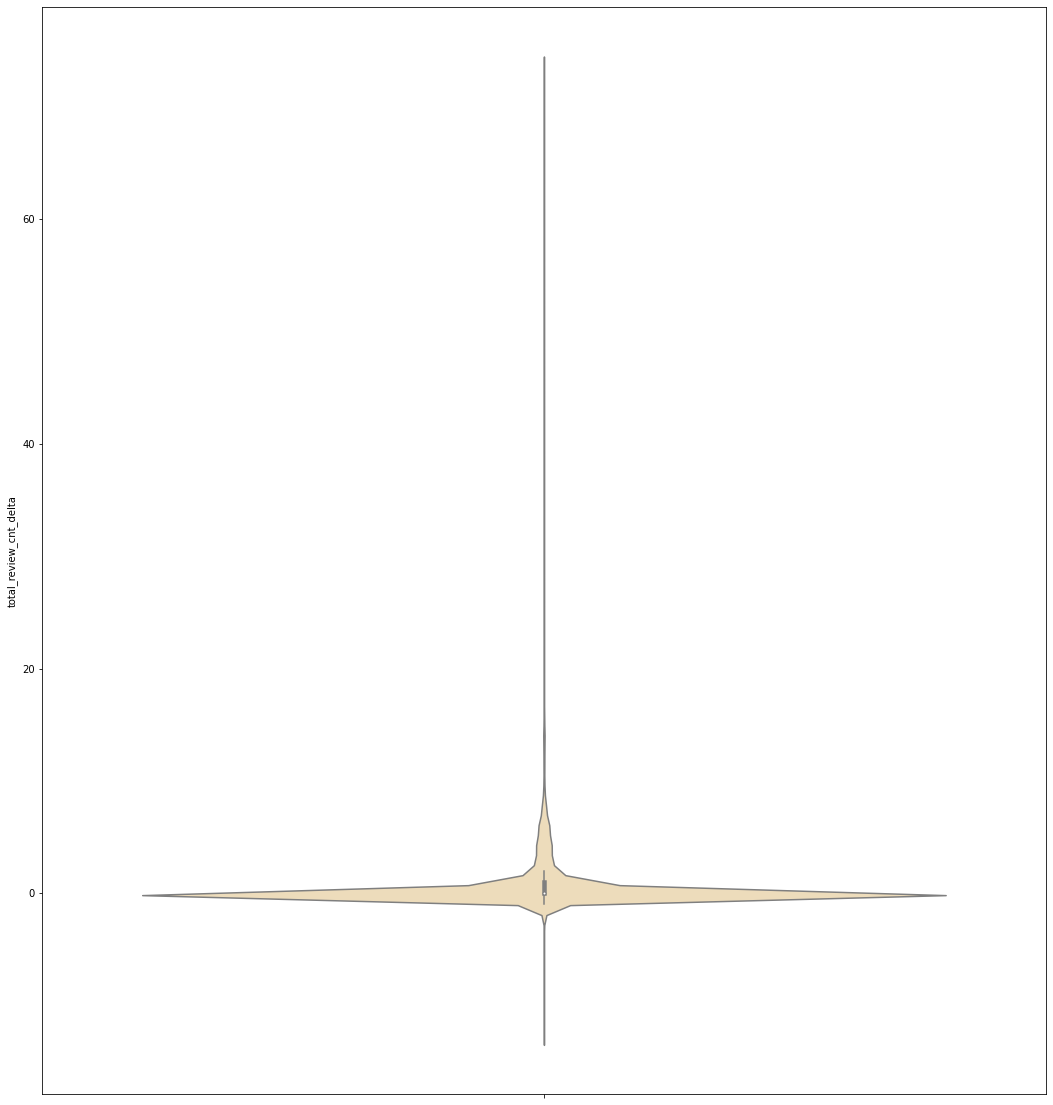

In [55]:
plt.figure(figsize=(18,20))
sns.violinplot( y = most_recent_holding['total_review_cnt_delta'], color='wheat',orient='v')
plt.title('')


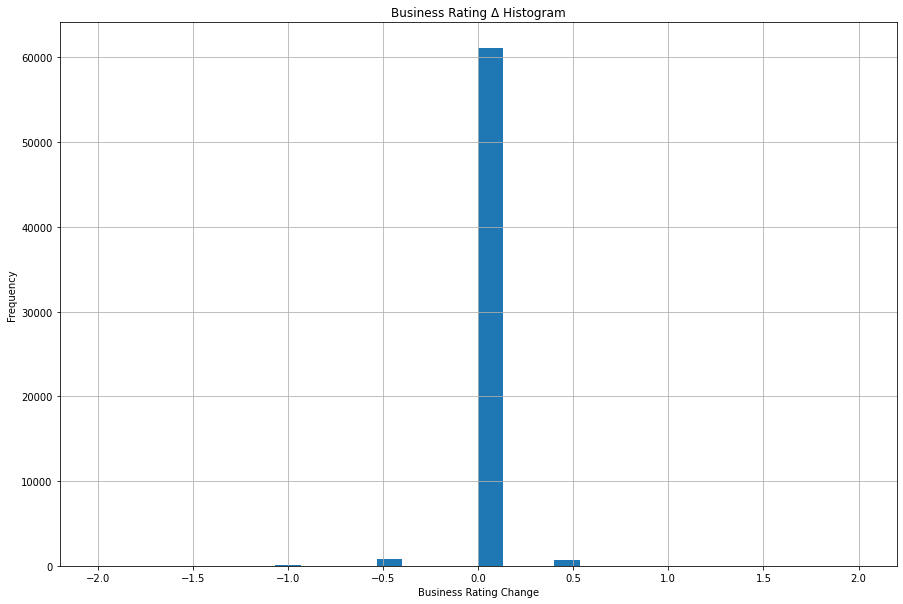

In [31]:
fig, ax = plt.subplots(figsize= (15,10))
ax.hist(most_recent_holding['total_bus_rating_delta'], bins=30)
ax.set_title(u'Business Rating Δ Histogram')
ax.set_ylabel('Frequency')
ax.set_xlabel('Business Rating Change')
ax.grid()
# plt.figure(figsize= (15,10))
# plt.hist(most_recent_holding['total_bus_rating_delta'], bins=30)

Over the span of a week or two our businesses haven't changed too much when we look at their total review count change or even the rating change. We can also take a more granular look at the data

In [37]:

most_recent_holding['total_review_cnt_delta'].agg(['size',np.mean, np.median, min, max, np.std] , axis=0).T

size     63,317.00
mean          0.76
median        0.00
min         -13.00
max          74.00
std           2.27
Name: total_review_cnt_delta, dtype: float64

In [12]:
print(most_recent_holding['total_review_cnt_delta'].value_counts(bins=10, normalize=True, sort=False))
print('\n')
print(most_recent_holding['total_review_cnt_delta'].value_counts(bins=10, sort=False))

(-13.088, -4.3]   0.00
(-4.3, 4.4]       0.95
(4.4, 13.1]       0.03
(13.1, 21.8]      0.00
(21.8, 30.5]      0.00
(30.5, 39.2]      0.00
(39.2, 47.9]      0.00
(47.9, 56.6]      0.00
(56.6, 65.3]      0.00
(65.3, 74.0]      0.00
Name: total_review_cnt_delta, dtype: float64


(-13.088, -4.3]        7
(-4.3, 4.4]        60232
(4.4, 13.1]         2015
(13.1, 21.8]         203
(21.8, 30.5]          75
(30.5, 39.2]          18
(39.2, 47.9]           6
(47.9, 56.6]           2
(56.6, 65.3]           8
(65.3, 74.0]           2
Name: total_review_cnt_delta, dtype: int64


In [13]:
print(most_recent_holding['total_bus_rating_delta'].value_counts(bins=10, normalize=True, sort=False))
print('\n')
print(most_recent_holding['total_bus_rating_delta'].value_counts(bins=10, sort=False))

(-2.005, -1.6]   0.00
(-1.6, -1.2]     0.00
(-1.2, -0.8]     0.00
(-0.8, -0.4]     0.01
(-0.4, 0.0]      0.96
(0.0, 0.4]       0.00
(0.4, 0.8]       0.01
(0.8, 1.2]       0.00
(1.2, 1.6]       0.00
(1.6, 2.0]       0.00
Name: total_bus_rating_delta, dtype: float64


(-2.005, -1.6]       12
(-1.6, -1.2]          7
(-1.2, -0.8]         40
(-0.8, -0.4]        758
(-0.4, 0.0]       61077
(0.0, 0.4]            0
(0.4, 0.8]          639
(0.8, 1.2]           19
(1.2, 1.6]            9
(1.6, 2.0]            7
Name: total_bus_rating_delta, dtype: int64


It seems there are a bucnbunchh of extreme values in the data , it might be best to go ahead and abstract some things a way as shown in the following table

In [66]:
pd.DataFrame.from_dict(
    {
        "Statistics": [
            "Mean",
            "Standard deviation",
            "Percent positive",
            "Percent zero",
            "Percent negative",
            "Number of observations",
        ],
        "Value": [
            most_recent_holding['total_bus_rating_delta'].describe()["mean"],
            most_recent_holding['total_bus_rating_delta'].describe()["std"],
            (most_recent_holding['total_bus_rating_delta'] > 0).sum() / most_recent_holding['total_bus_rating_delta'].shape[0] * 100,
            (most_recent_holding['total_bus_rating_delta'] == 0).sum() / most_recent_holding['total_bus_rating_delta'].shape[0] * 100,
            (most_recent_holding['total_bus_rating_delta'] < 0).sum() / most_recent_holding['total_bus_rating_delta'].shape[0] * 100,
            most_recent_holding['total_bus_rating_delta'].describe()["count"],
        ],
    }
)

,Statistics,Value
0,Mean,-0.00
1,Standard deviation,0.09
2,Percent positive,1.06
3,Percent zero,96.46
4,Percent negative,1.29
5,Number of observations,"62,568.00"


Here we can see 96% of the businesses didn't even get one review in that case no need to go as in-depth with the **total_bus_rating_delta** column

Looking at the absolute values of the review counts we can see that there are a good number of extreme values. We can separate these and see differences we find between the two groups.\
Looking ahead we probably would not want to discard these as they could serve as good dependent variables, if they were independent we would have more freedom in this respect.

In [14]:
thirdq, firstq = most_recent_holding['total_review_cnt_delta'].quantile(.75), most_recent_holding['total_review_cnt_delta'].quantile(.25)
quartilerange = 1.5 * (thirdq - firstq)
highoutlier, lowoutlier = quartilerange + thirdq, firstq - quartilerange
print(highoutlier, lowoutlier, sep='<---->')

2.5<---->-1.5


The above shows what can be considered an extreme value for the review counts and the following will show the criteria for the rating

In [15]:
thirdq2, firstq2 = most_recent_holding['total_bus_rating_delta'].quantile(.75), most_recent_holding['total_bus_rating_delta'].quantile(.25)
quartilerange2 = 1.5 * (thirdq2 - firstq2)
highoutlier2, lowoutlier2 = quartilerange2 + thirdq2, firstq2 - quartilerange2
print(highoutlier2, lowoutlier2, sep='<---->')

0.0<---->0.0


In [16]:
def get_outliers():
  dfout = pd.DataFrame(columns = most_recent_holding.columns, data=None) #initializes a dataframe with no values but all orig. columns from df
  for col in ['total_bus_rating_delta', 'total_review_cnt_delta']: # just going to loop through the numeric columns
    thirdq, firstq = most_recent_holding[col].quantile(0.75), most_recent_holding[col].quantile(0.25)
    quartilerange = 1.5*(thirdq-firstq)
    highoutlier, lowoutlier = quartilerange + thirdq, firstq - quartilerange
    df = most_recent_holding.loc[(most_recent_holding[col] > highoutlier) | (most_recent_holding[col] < lowoutlier)] # for each columns we will isolate the extreme values
    df = df.assign(varname = col, threshlow= lowoutlier, threshhigh= highoutlier) # creates 3 new columns that corresponds to a label and the high outlier , and then the low outlier for that label respectively
    dfout = pd.concat([dfout,df]) # just a simple concatenation of the dfs
  return dfout

extreme_df = get_outliers()

Now in this new dataframe any business that is considered an extreme value ,on the basis of any column, will be added to the dataframe. This allows a business to be added twice if it considered an extreme value by both of the columns we chose

In [17]:
extreme_df

,BusinessName,ChainName,BusinessRating,ReviewCount,CloseDate,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta,varname,threshlow,threshhigh
47,zoners-pizza-wings-and-waffles-waycross,"Zoner's Pizza, Wings and Waffles",2.50,15,2022-01-13,15.00,2.50,0.00,0.00,1.00,-0.50,total_bus_rating_delta,0.00,0.00
130,zeus-flowood-flowood,Zeus - Flowood,4.00,32,2022-01-13,32.00,4.00,0.00,0.00,1.00,-0.50,total_bus_rating_delta,0.00,0.00
146,zest-kitchen-and-bar-port-st-lucie,Zest Kitchen & Bar,4.00,69,2022-01-13,69.00,4.00,0.00,0.00,2.00,-0.50,total_bus_rating_delta,0.00,0.00
233,zaxbys-chicken-fingers-and-buffalo-wings-perry,Zaxby's Chicken Fingers & Buffalo Wings,2.00,33,2022-01-13,32.00,2.50,1.00,-0.50,3.00,-0.50,total_bus_rating_delta,0.00,0.00
239,zaxbys-chicken-fingers-and-buffalo-wings-morri...,Zaxby's Chicken Fingers & Buffalo Wings,4.00,9,2022-01-13,9.00,4.00,0.00,0.00,2.00,0.50,total_bus_rating_delta,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63280,111-park-espresso-bar-raton,111 Park Espresso Bar,4.50,136,2022-01-13,136.00,4.50,0.00,0.00,3.00,0.00,total_review_cnt_delta,-1.50,2.50
63281,110-grill-rochester-2,110 Grill,4.00,191,2022-01-13,190.00,4.00,1.00,0.00,4.00,0.00,total_review_cnt_delta,-1.50,2.50
63284,110-grill-braintree-2,110 Grill,4.00,463,2022-01-13,463.00,4.00,0.00,0.00,6.00,0.00,total_review_cnt_delta,-1.50,2.50
63297,101-taiwanese-cuisine-reno,101 Taiwanese Cuisine,4.00,1143,2022-01-13,"1,142.00",4.00,1.00,0.00,6.00,0.00,total_review_cnt_delta,-1.50,2.50


Here we have the names of the businesses considered extreme in both columns

In [18]:
grouped_extreme_df = extreme_df.groupby(['BusinessName'], as_index=False)['varname'].count()
grouped_extreme_df_bus = grouped_extreme_df.loc[grouped_extreme_df['varname'] > 1, ['BusinessName']]
grouped_extreme_df_bus

,BusinessName
19,207-bistro-and-blues-mccomb
33,3natives-lakewood-ranch
36,412-public-house-cullman
61,7908-aspen-aspen
165,aloy-dee-eustis
...,...
6766,vinnys-italian-grill-and-pizzeria-stafford-2
6927,woodys-steak-house-ottawa
6966,yellowfin-sushi-and-sake-bar-cape-coral
6990,yummys-greek-restaurant-denton


In [19]:
exe_most_recent_holding = most_recent_holding.loc[most_recent_holding['BusinessName'].isin(grouped_extreme_df_bus['BusinessName'].values), :]
exe_most_recent_holding = exe_most_recent_holding.reset_index(drop=True)
exe_most_recent_holding

,BusinessName,ChainName,BusinessRating,ReviewCount,CloseDate,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta
0,zaxbys-chicken-fingers-and-buffalo-wings-perry,Zaxby's Chicken Fingers & Buffalo Wings,2.00,33,2022-01-13,32.00,2.50,1.00,-0.50,3.00,-0.50
1,yummys-greek-restaurant-denton,Yummy's Greek Restaurant,4.50,156,2022-01-13,156.00,4.50,0.00,0.00,3.00,0.50
2,yellowfin-sushi-and-sake-bar-cape-coral,YellowFin Sushi & Sake Bar,4.00,122,2022-01-13,122.00,4.00,0.00,0.00,4.00,-0.50
3,woodys-steak-house-ottawa,Woody's Steak House,2.50,85,2022-01-13,85.00,2.50,0.00,0.00,3.00,-0.50
4,vinnys-italian-grill-and-pizzeria-stafford-2,Vinny's Italian Grill & Pizzeria,3.50,260,2022-01-13,260.00,3.50,0.00,0.00,7.00,-0.50
...,...,...,...,...,...,...,...,...,...,...,...
148,aloy-dee-eustis,Aloy Dee,5.00,48,2022-01-13,48.00,5.00,0.00,0.00,3.00,0.50
149,7908-aspen-aspen,7908 Aspen,4.50,67,2022-01-13,67.00,4.50,0.00,0.00,4.00,0.50
150,412-public-house-cullman,412 Public House,4.50,109,2022-01-13,109.00,4.50,0.00,0.00,3.00,0.50
151,3natives-lakewood-ranch,3Natives,4.50,21,2022-01-13,21.00,4.50,0.00,0.00,3.00,-0.50


Now that we have our extreme values we can look to discover what makes them different

In [20]:
print(exe_most_recent_holding['total_bus_rating_delta'].value_counts( ascending=False).sort_index())
print('\n')
print(exe_most_recent_holding['total_review_cnt_delta'].value_counts(ascending=False).sort_index())

-1.00     1
-0.50    96
0.50     56
Name: total_bus_rating_delta, dtype: int64


-5.00     1
-3.00     4
-2.00    11
3.00     64
4.00     36
5.00     15
6.00      8
7.00      6
8.00      2
9.00      2
10.00     1
12.00     1
16.00     1
23.00     1
Name: total_review_cnt_delta, dtype: int64


In [21]:
exe_most_recent_holding.describe(include='all')

,BusinessName,ChainName,BusinessRating,ReviewCount,CloseDate,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta
count,153,153,153.00,153.00,153,153.00,153.00,153.00,153.00,153.00,153.00
unique,153,151,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,zaxbys-chicken-fingers-and-buffalo-wings-perry,Texas Roadhouse,NaN,NaN,2022-01-13,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2,NaN,NaN,152,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.95,197.88,NaN,197.58,3.97,0.30,-0.02,3.64,-0.14
std,NaN,NaN,0.63,258.87,NaN,258.74,0.63,0.64,0.15,3.15,0.49
min,NaN,NaN,2.00,1.00,NaN,1.00,2.00,-1.00,-0.50,-5.00,-1.00
25%,NaN,NaN,3.50,30.00,NaN,30.00,3.50,0.00,0.00,3.00,-0.50
50%,NaN,NaN,4.00,86.00,NaN,86.00,4.00,0.00,0.00,3.00,-0.50
75%,NaN,NaN,4.50,279.00,NaN,278.00,4.50,1.00,0.00,4.00,0.50


It's going to be better to make a join with the categories, payment levels, and even county growth to get more information out . So to begin we'll join the data with `bus_cat_dataframe`

In [22]:
exe_most_recent_holding.to_csv('exe_most_recent_holding.csv',sep='|', index=False )


Here we have to remember that we'll get duplicate businesses due to there being categories involved

In [23]:
exe_most_recent_holding_loc = bus_cat_dataframe.merge(right=exe_most_recent_holding, how='inner', on = 'BusinessName')
exe_most_recent_holding_loc

,BusinessKey,BusinessName,ChainName_x,PaymentLevelName,Longitude,Latitude,BusinessCategoryName,CityName,CountyName,StateName,...,ChainName_y,BusinessRating,ReviewCount,CloseDate,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta
0,8355,tokyo-japanese-steakhouse-seafood-and-sushi-ba...,Tokyo Japanese Steakhouse Seafood & Sushi Bar,Low,-87.26,30.53,Japanese,Pensacola,Escambia County,Florida,...,Tokyo Japanese Steakhouse Seafood & Sushi Bar,2.50,90,2022-01-13,90.00,2.50,0.00,0.00,4.00,-0.50
1,8355,tokyo-japanese-steakhouse-seafood-and-sushi-ba...,Tokyo Japanese Steakhouse Seafood & Sushi Bar,Low,-87.26,30.53,Steakhouses,Pensacola,Escambia County,Florida,...,Tokyo Japanese Steakhouse Seafood & Sushi Bar,2.50,90,2022-01-13,90.00,2.50,0.00,0.00,4.00,-0.50
2,8355,tokyo-japanese-steakhouse-seafood-and-sushi-ba...,Tokyo Japanese Steakhouse Seafood & Sushi Bar,Low,-87.26,30.53,Sushi Bars,Pensacola,Escambia County,Florida,...,Tokyo Japanese Steakhouse Seafood & Sushi Bar,2.50,90,2022-01-13,90.00,2.50,0.00,0.00,4.00,-0.50
3,9764,himalayan-curry-kitchen-richmond-hill,Himalayan Curry Kitchen,Low,-81.31,31.95,Indian,Richmond Hill,Bryan County,Georgia,...,Himalayan Curry Kitchen,4.50,231,2022-01-13,230.00,4.50,1.00,0.00,6.00,-0.50
4,9764,himalayan-curry-kitchen-richmond-hill,Himalayan Curry Kitchen,Low,-81.31,31.95,Himalayan/Nepalese,Richmond Hill,Bryan County,Georgia,...,Himalayan Curry Kitchen,4.50,231,2022-01-13,230.00,4.50,1.00,0.00,6.00,-0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,61281,new-fortune-asian-cuisine-cedarburg,New Fortune Asian Cuisine,Low,-87.99,43.30,Chinese,Cedarburg,Ozaukee County,Wisconsin,...,New Fortune Asian Cuisine,4.50,77,2022-01-13,76.00,4.50,1.00,0.00,4.00,0.50
335,17260,great-wall-restaurant-newton,Great Wall Restaurant,Very Low,-97.34,38.01,Chinese,Newton,Harvey County,Kansas,...,Great Wall Restaurant,3.50,13,2022-01-13,13.00,3.50,0.00,0.00,-3.00,-0.50
336,41725,s-and-bs-burger-joint-lawton,S&B's Burger Joint,Low,-98.44,34.62,Burgers,Lawton,Comanche County,Oklahoma,...,S&B's Burger Joint,3.50,175,2022-01-13,175.00,3.50,0.00,0.00,3.00,-0.50
337,5962,campo-de-fiori-aspen,Campo De Fiori,High,-106.82,39.19,Italian,Aspen,Pitkin County,Colorado,...,Campo De Fiori,3.50,142,2022-01-13,140.00,4.00,2.00,-0.50,5.00,-0.50


In [24]:
exe_most_recent_holding_loc.describe(include='all')

,BusinessKey,BusinessName,ChainName_x,PaymentLevelName,Longitude,Latitude,BusinessCategoryName,CityName,CountyName,StateName,...,ChainName_y,BusinessRating,ReviewCount,CloseDate,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta
count,339.00,339,339,339,339.00,339.00,339,339,339,339,...,339,339.00,339.00,339,339.00,339.00,339.00,339.00,339.00,339.00
unique,NaN,153,151,5,NaN,NaN,78,142,136,41,...,151,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,tokyo-japanese-steakhouse-seafood-and-sushi-ba...,Texas Roadhouse,Low,NaN,NaN,American (Traditional),Reno,Manatee County,Florida,...,Texas Roadhouse,NaN,NaN,2022-01-13,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,6,180,NaN,NaN,22,7,11,49,...,6,NaN,NaN,338,NaN,NaN,NaN,NaN,NaN,NaN
mean,"26,927.25",NaN,NaN,NaN,-93.15,35.88,NaN,NaN,NaN,NaN,...,NaN,3.95,215.75,NaN,215.42,3.97,0.33,-0.02,3.70,-0.14
std,"20,453.63",NaN,NaN,NaN,16.14,5.54,NaN,NaN,NaN,NaN,...,NaN,0.63,276.72,NaN,276.58,0.64,0.64,0.16,3.13,0.49
min,323.00,NaN,NaN,NaN,-159.32,18.47,NaN,NaN,NaN,NaN,...,NaN,2.00,1.00,NaN,1.00,2.00,-1.00,-0.50,-5.00,-1.00
25%,"8,036.00",NaN,NaN,NaN,-104.79,31.95,NaN,NaN,NaN,NaN,...,NaN,3.50,33.00,NaN,32.00,3.50,0.00,0.00,3.00,-0.50
50%,"21,721.00",NaN,NaN,NaN,-87.26,36.30,NaN,NaN,NaN,NaN,...,NaN,4.00,105.00,NaN,105.00,4.00,0.00,0.00,3.00,-0.50
75%,"46,301.00",NaN,NaN,NaN,-81.64,39.72,NaN,NaN,NaN,NaN,...,NaN,4.50,307.50,NaN,307.50,4.50,1.00,0.00,4.00,0.50


Here we're just going to want to take to explore the categories and after remove the duplicates to not create noise in the other categories

In [25]:
top_15_bus_cat = exe_most_recent_holding_loc['BusinessCategoryName'].value_counts(normalize=True).head(15)
top_15_bus_cat

American (Traditional)   0.06
Steakhouses              0.05
Breakfast & Brunch       0.05
Sushi Bars               0.04
Burgers                  0.04
Seafood                  0.04
Sandwiches               0.04
Japanese                 0.04
Mexican                  0.04
Coffee & Tea             0.03
Bars                     0.03
Italian                  0.03
Pizza                    0.03
Salad                    0.02
Chicken Wings            0.02
Name: BusinessCategoryName, dtype: float64

Before making comparisons with our other data we're going to remove the extreme values from it to get a clean comparision

In [26]:
most_recent_holding_sin_exe = most_recent_holding[~most_recent_holding['BusinessName'].isin(grouped_extreme_df_bus['BusinessName'].values)]
most_recent_holding_sin_exe = most_recent_holding_sin_exe.reset_index(drop=True)
most_recent_holding_sin_exe

,BusinessName,ChainName,BusinessRating,ReviewCount,CloseDate,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta
0,él-torito-restaurant-georgetown,Él Torito Restaurant,4.00,2,2022-01-13,2.00,4.00,0.00,0.00,0.00,0.00
1,ándale-caguas-2,Ándale,5.00,3,2022-01-13,3.00,5.00,0.00,0.00,0.00,0.00
2,àlavita-boise-2,ÀLAVITA,4.00,304,2022-01-13,304.00,4.00,0.00,0.00,0.00,0.00
3,zzzz-s-pizzzza-burlington,ZZZZ’s PIzzzza,5.00,1,2022-01-13,1.00,5.00,0.00,0.00,0.00,0.00
4,zzs-sports-bar-and-grill-adrian,ZZ's Sports Bar & Grill,3.50,10,2022-01-13,10.00,3.50,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
63159,10-40-coffee-west-plains,10/40 Coffee,5.00,11,2022-01-13,11.00,5.00,0.00,0.00,0.00,0.00
63160,1-north-steakhouse-hampton-bays-2,1 North Steakhouse,4.00,149,2022-01-13,149.00,4.00,0.00,0.00,2.00,0.00
63161,1-more-bar-and-grille-bright,1 More Bar & Grille,4.00,9,2022-01-13,9.00,4.00,0.00,0.00,0.00,0.00
63162,1-cow-ten-sleep,1 Cow,4.50,6,2022-01-13,6.00,4.50,0.00,0.00,0.00,0.00


Here we'll merge our data with the business categories

In [27]:
most_recent_holding_cat_sin_exe = bus_cat_dataframe.merge(right=most_recent_holding_sin_exe[['BusinessName']], how='inner', on = 'BusinessName')
most_recent_holding_cat_sin_exe

,BusinessKey,BusinessName,ChainName,PaymentLevelName,Longitude,Latitude,BusinessCategoryName,CityName,CountyName,StateName,CountryName
0,23,eastern-shore-street-eats-daphne,Eastern Shore Street Eats,Unknown,-87.87,30.61,American (Traditional),Daphne,Baldwin County,Alabama,US
1,23,eastern-shore-street-eats-daphne,Eastern Shore Street Eats,Unknown,-87.87,30.61,Food Trucks,Daphne,Baldwin County,Alabama,US
2,33,chris-hot-dogs-montgomery-2,Chris' Hot Dogs,Very Low,-86.31,32.38,Hot Dogs,Montgomery,Autauga County,Alabama,US
3,122,benjas-thai-and-sushi-restaurant-mobile,Benja's Thai & Sushi Restaurant,Low,-88.19,30.66,Sushi Bars,Mobile,Mobile County,Alabama,US
4,122,benjas-thai-and-sushi-restaurant-mobile,Benja's Thai & Sushi Restaurant,Low,-88.19,30.66,Thai,Mobile,Mobile County,Alabama,US
...,...,...,...,...,...,...,...,...,...,...,...
126183,62893,munchies-evanston,Munchies,Unknown,-110.97,41.27,Hot Dogs,Evanston,Uinta County,Wyoming,US
126184,63106,don-juan-mexican-restaurant-casper,Don Juan Mexican Restaurant,Very Low,-106.33,42.85,Mexican,Casper,Natrona County,Wyoming,US
126185,63128,the-hangar-bar-and-grill-bar-nunn,The Hangar Bar And Grill,Low,-106.34,42.91,American (Traditional),Bar Nunn,Natrona County,Wyoming,US
126186,63155,wyoming-hot-wings-casper,Wyoming Hot Wings,Low,-106.30,42.84,Chicken Wings,Casper,Converse County,Wyoming,US


Recap of the cateogories in the `exe_most_recent_holding_loc` dataframe

In [28]:
top_15_bus_cat

American (Traditional)   0.06
Steakhouses              0.05
Breakfast & Brunch       0.05
Sushi Bars               0.04
Burgers                  0.04
Seafood                  0.04
Sandwiches               0.04
Japanese                 0.04
Mexican                  0.04
Coffee & Tea             0.03
Bars                     0.03
Italian                  0.03
Pizza                    0.03
Salad                    0.02
Chicken Wings            0.02
Name: BusinessCategoryName, dtype: float64

Some of these top categories look rather familiar we're going to check our original data and compare them

In [29]:
top_15_bus_cat_orig = most_recent_holding_cat_sin_exe['BusinessCategoryName'].value_counts(normalize=True).head(15)
top_15_bus_cat_orig

American (Traditional)      0.07
Pizza                       0.05
Burgers                     0.05
Sandwiches                  0.05
Mexican                     0.05
Breakfast & Brunch          0.05
Fast Food                   0.04
Coffee & Tea                0.04
Seafood                     0.03
American (New)              0.03
Bars                        0.03
Italian                     0.02
Ice Cream & Frozen Yogurt   0.02
Barbeque                    0.02
Bakeries                    0.02
Name: BusinessCategoryName, dtype: float64

We'll compare them side-by-side

In [30]:
top_15_bus_cat.reset_index().merge(right=top_15_bus_cat_orig.reset_index(), on='index', how='outer')

,index,BusinessCategoryName_x,BusinessCategoryName_y
0,American (Traditional),0.06,0.07
1,Steakhouses,0.05,NaN
2,Breakfast & Brunch,0.05,0.05
3,Sushi Bars,0.04,NaN
4,Burgers,0.04,0.05
5,Seafood,0.04,0.03
6,Sandwiches,0.04,0.05
7,Japanese,0.04,NaN
8,Mexican,0.04,0.05
9,Coffee & Tea,0.03,0.04


> **remove nulls and make connection that there is good overlap between the most popular categories extreme values dataset and also the original... so we have to look further for some other independent variable**

To begin bus_cat_dataframe and holding_dataframe will be merged to get some summary statistics 

In [27]:
bus_cat_holding= bus_cat_dataframe.merge(right=holding_dataframe, how='inner', on = 'BusinessName')

In [28]:
bus_cat_holding

,BusinessKey,BusinessName,ChainName_x,PaymentLevelName,Longitude,Latitude,BusinessCategoryName,CityName,CountyName,StateName,...,ChainName_y,BusinessRating,ReviewCount,CloseDate,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta
0,23,eastern-shore-street-eats-daphne,Eastern Shore Street Eats,Unknown,-87.87,30.61,American (Traditional),Daphne,Baldwin County,Alabama,...,Eastern Shore Street Eats,5.00,5,2021-12-29,NaN,NaN,NaN,NaN,0.00,0.00
1,23,eastern-shore-street-eats-daphne,Eastern Shore Street Eats,Unknown,-87.87,30.61,American (Traditional),Daphne,Baldwin County,Alabama,...,Eastern Shore Street Eats,5.00,5,2022-01-04,5.00,5.00,0.00,0.00,0.00,0.00
2,23,eastern-shore-street-eats-daphne,Eastern Shore Street Eats,Unknown,-87.87,30.61,American (Traditional),Daphne,Baldwin County,Alabama,...,Eastern Shore Street Eats,5.00,5,2022-01-06,5.00,5.00,0.00,0.00,0.00,0.00
3,23,eastern-shore-street-eats-daphne,Eastern Shore Street Eats,Unknown,-87.87,30.61,American (Traditional),Daphne,Baldwin County,Alabama,...,Eastern Shore Street Eats,5.00,5,2022-01-07,5.00,5.00,0.00,0.00,0.00,0.00
4,23,eastern-shore-street-eats-daphne,Eastern Shore Street Eats,Unknown,-87.87,30.61,American (Traditional),Daphne,Baldwin County,Alabama,...,Eastern Shore Street Eats,5.00,5,2022-01-08,5.00,5.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019912,63221,rendezvous-meadows-golf-course-pinedale,Rendezvous Meadows Golf Course,Unknown,-109.88,42.86,Golf,Pinedale,Sublette County,Wyoming,...,Rendezvous Meadows Golf Course,4.00,1,2022-01-09,1.00,4.00,0.00,0.00,0.00,0.00
1019913,63221,rendezvous-meadows-golf-course-pinedale,Rendezvous Meadows Golf Course,Unknown,-109.88,42.86,Golf,Pinedale,Sublette County,Wyoming,...,Rendezvous Meadows Golf Course,4.00,1,2022-01-10,1.00,4.00,0.00,0.00,0.00,0.00
1019914,63221,rendezvous-meadows-golf-course-pinedale,Rendezvous Meadows Golf Course,Unknown,-109.88,42.86,Golf,Pinedale,Sublette County,Wyoming,...,Rendezvous Meadows Golf Course,4.00,1,2022-01-11,1.00,4.00,0.00,0.00,0.00,0.00
1019915,63221,rendezvous-meadows-golf-course-pinedale,Rendezvous Meadows Golf Course,Unknown,-109.88,42.86,Golf,Pinedale,Sublette County,Wyoming,...,Rendezvous Meadows Golf Course,4.00,1,2022-01-12,1.00,4.00,0.00,0.00,0.00,0.00


Now we'll group by categoryname and check out some aggregates results

In [29]:
cat_groups = bus_cat_holding.groupby(['BusinessCategoryName'], as_index=False)[['ReviewCount','BusinessRating']].agg({"ReviewCount": ['sum', 'mean', 'max'], "BusinessRating": ['mean', 'max']})
cat_groups

BusinessCategoryName ReviewCount              BusinessRating     
                                 sum   mean   max           mean  max
0      ATV Rentals/Tours        1081  25.14    55           4.16 5.00
1             Acai Bowls       39509 103.16   530           4.43 5.00
2            Accessories         628   7.75    53           4.26 5.00
3            Active Life          45   5.00     5           4.50 4.50
4           Aerial Tours        1143 127.00   128           3.00 3.00
..                   ...         ...    ...   ...            ...  ...
526                Wraps      115936  67.80  1057           4.20 5.00
527          Yelp Events        1640  28.28   129           4.88 5.00
528                 Yoga        1072  16.49    36           4.75 5.00
529            Ziplining        9334  75.27   184           4.63 5.00
530                 Zoos      118193 140.54  1162           4.41 5.00

[531 rows x 6 columns]

Here we took a some of the review count which isn't the best statistic considering our data consists of review counts at the end of each data however it does give some insight into the most visited businesses.\
To make more sense of the data it would be best to sort on some columns

In [30]:
cat_groups_Sorted = cat_groups.sort_values(by=[('ReviewCount', 'mean'), ('BusinessRating', 'mean'), ('ReviewCount', 'sum')], ascending=False)
cat_groups_Sorted.head(10)

BusinessCategoryName ReviewCount                BusinessRating     
                                 sum     mean   max           mean  max
382       Public Markets       45610 5,701.25  5709           4.50 4.50
418         Shanghainese      162829 1,536.12  6561           4.06 4.50
176             Eritrean        9288 1,161.00  1162           4.50 4.50
254              Iberian       18058 1,128.62  2107           4.00 4.00
84               Burmese       89781   965.39  7016           4.32 5.00
266              Izakaya       95012   931.49  3228           4.21 4.50
293        Live/Raw Food      218686   896.25  7566           4.30 5.00
73            Brasseries       60782   832.63  3987           4.23 4.50
481       Train Stations       13145   821.56  1430           4.25 4.50
438        South African       12386   774.12  1544           4.75 5.00

What's interesting is that these businesses seem to be very niche and don't seem that they would be frequented by a diverse range of visitors aside from the public markets \
We're going to modify our sort and see what happens

In [31]:
cat_groups_Sorted = cat_groups.sort_values(by=[('ReviewCount', 'sum'), ('ReviewCount', 'mean'),  ('BusinessRating', 'mean')], ascending=False)
cat_groups_Sorted.head(10)

BusinessCategoryName ReviewCount               BusinessRating     
                                    sum   mean    max           mean  max
75       Breakfast & Brunch     9637202 204.72  14427           4.04 5.00
10   American (Traditional)     8900598 124.11  14427           3.83 5.00
9            American (New)     7674123 254.40   8950           4.06 5.00
413                 Seafood     6736574 223.77   7566           3.95 5.00
408              Sandwiches     5456321 110.00  13232           3.87 5.00
43                     Bars     4906321 167.74   8860           3.97 5.00
362                   Pizza     4601787  88.91   6442           3.78 5.00
83                  Burgers     4288343  84.98   5933           3.42 5.00
305                 Mexican     3937891  82.86   5082           3.88 5.00
265                 Italian     3937000 170.00   6442           3.99 5.00

Here we get a different picture but it could be perhaps misleading shown by the following business category counts

In [32]:
bus_cat_holding.groupby(['BusinessCategoryName'], as_index=False)['BusinessName'].count().sort_values(by=[
    'BusinessName'], ascending=False).head(10)

,BusinessCategoryName,BusinessName
10,American (Traditional),71714
362,Pizza,51758
83,Burgers,50460
408,Sandwiches,49602
305,Mexican,47523
75,Breakfast & Brunch,47075
123,Coffee & Tea,40700
184,Fast Food,40587
9,American (New),30166
413,Seafood,30105


Here a decision has to be made do would we really want to go in the above industries knowing there is going to be much competition? Maybe that's a good sign showing less barriers to entry?
Checking the first set of criteria the businesses categories seem rather diffcult to break into so we will decide to stick with the more common business.
